# WeatherPy


In [1]:
#%matplotlib notebook

In [2]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
#from sklearn.linear_model import LinearRegression
#Import API key

from api_keys  import weather_api_key

#Incorporated citipy to determine  city based on latitude and longitude
from citipy import citipy

#Output File(CSV)

output_data_file =  "output_data/cities.csv"







## Generate Cities List

In [3]:
#Range of latidudes and longitudes
lat_range = (-90,90)
lng_range = (-180,180)


#List for holding  lat_ings and cities
lat_ings = []
cities = []

#Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0],lat_range[1],size=1500)
lngs = np.random.uniform(lng_range[0],lng_range[1],size=1500)
lat_lngs = zip(lats,lngs)

#Identify nearest city for each lat,lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name


#If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
#Print the city count to confirm sufficient count
len(cities)



604

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=96bb8fdd3cf7b91fd7c4718a00616878&units=imperial&q=


## Perform API Calls

In [5]:
# set up lists to hold reponse info
lat = []
temp = []
cityList = []
lon = []
maxTemp = []
humidity = []
cloudiness = []
windSpeed = []
country = []
date = []


# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval...")
print("----------------------------")
count = 0
set = 1
for city in cities:
    count = count+1
    if count == 50:
        count = 0
        set = set+1
    #make api call        
    response = requests.get(query_url + city).json()
    #print(response)
    try:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        date.append(response['dt'])
        cityList.append(response['name'])
        lon.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        print(f"Processing Record {count} of Set {set} | {city}")
    except KeyError:
        print("City not found.****...")


            



Beginning Data Retrieval...
----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | sangar
Processing Record 4 of Set 1 | rocha
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | woodend
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | turayf
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | axim
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | muros
Processing Record 16 of Set 1 | edwardsville
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | arraial do cabo
City not found.****...
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | lere
Processing Record 23 of Set 1 | busselton
City not found.****...
Processing

Processing Record 6 of Set 5 | paysandu
Processing Record 7 of Set 5 | bandarbeyla
Processing Record 8 of Set 5 | nanortalik
Processing Record 9 of Set 5 | chalmette
Processing Record 10 of Set 5 | luena
Processing Record 11 of Set 5 | swan hill
Processing Record 12 of Set 5 | erzin
Processing Record 13 of Set 5 | umea
Processing Record 14 of Set 5 | leshukonskoye
Processing Record 15 of Set 5 | georgetown
Processing Record 16 of Set 5 | ihiala
Processing Record 17 of Set 5 | tasiilaq
Processing Record 18 of Set 5 | morant bay
Processing Record 19 of Set 5 | kirgiz-miyaki
City not found.****...
Processing Record 21 of Set 5 | isangel
Processing Record 22 of Set 5 | westport
Processing Record 23 of Set 5 | itarema
Processing Record 24 of Set 5 | fairbanks
Processing Record 25 of Set 5 | severo-yeniseyskiy
Processing Record 26 of Set 5 | adeje
Processing Record 27 of Set 5 | torbay
Processing Record 28 of Set 5 | kiama
Processing Record 29 of Set 5 | port lincoln
Processing Record 30 of 

Processing Record 14 of Set 9 | beloha
Processing Record 15 of Set 9 | ostrovnoy
City not found.****...
Processing Record 17 of Set 9 | carndonagh
Processing Record 18 of Set 9 | saint peters
Processing Record 19 of Set 9 | grootfontein
Processing Record 20 of Set 9 | yalta
Processing Record 21 of Set 9 | sorland
Processing Record 22 of Set 9 | beisfjord
City not found.****...
City not found.****...
Processing Record 25 of Set 9 | iquique
Processing Record 26 of Set 9 | comodoro rivadavia
Processing Record 27 of Set 9 | klaksvik
Processing Record 28 of Set 9 | wuda
Processing Record 29 of Set 9 | ewa beach
Processing Record 30 of Set 9 | ukiah
City not found.****...
Processing Record 32 of Set 9 | yamada
Processing Record 33 of Set 9 | paramonga
Processing Record 34 of Set 9 | paraiso
Processing Record 35 of Set 9 | shinshiro
Processing Record 36 of Set 9 | qaqortoq
Processing Record 37 of Set 9 | korla
Processing Record 38 of Set 9 | zhoukou
Processing Record 39 of Set 9 | quelimane
P

## Convert  Raw Data to DataFrame


In [6]:
summary_dict = {}

summary_dict["Latitude"] = lat

summary_dict["Temperature"] =temp

summary_dict["City"] =cityList

summary_dict["Longitude"] = lon

summary_dict["Max Temperature"] = maxTemp

summary_dict["Humidity"] = humidity

summary_dict["Cloudiness"] = cloudiness

summary_dict["Wind Speed"] = windSpeed

summary_dict["Country"] = country

summary_dict["Date"] = date

print("Latitude ", len(lat))
print("Temperature ",len(temp ))
print("CityList ",len(cityList))
      
print("Longitude ", len(lon))
print("MaxTemperature ",len(maxTemp))
print("Humidity ",len(humidity))
print("Cloudiness ",len(cloudiness))
print("WindSpeed ",len(windSpeed))
print("Country ",len(country))
print("Date " ,len(date))
    
df = pd.DataFrame.from_dict(summary_dict)  
# write dataframe to output csv file
df.to_csv( "output_data/cities.csv")

Latitude  558
Temperature  558
CityList  558
Longitude  558
MaxTemperature  558
Humidity  558
Cloudiness  558
WindSpeed  558
Country  558
Date  558


## Inspect the data and remove  cities where the  humidity > 100%.

In [7]:

df.loc[df["Humidity"]>100]

,Latitude,Temperature,City,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data

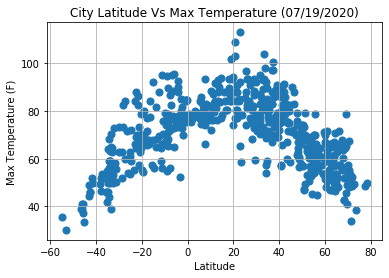

<Figure size 432x288 with 0 Axes>

In [8]:

plt.scatter(df['Latitude'],df['Max Temperature'],s=50)
plt.grid(True)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("City Latitude Vs Max Temperature (07/19/2020)")
plt.show()
plt.savefig("../images/Lat_MaxTemp.png")

## Latitude vs  Humidity  Plot

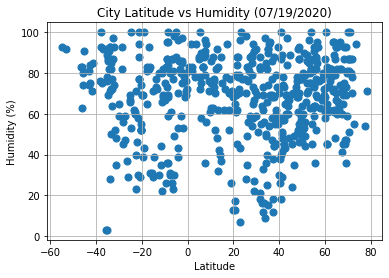

In [9]:
plt.scatter(df['Latitude'],df['Humidity'],s=50)
plt.grid(True)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs Humidity (07/19/2020)")
plt.show()



## Latitude vs. Cloudiness Plot

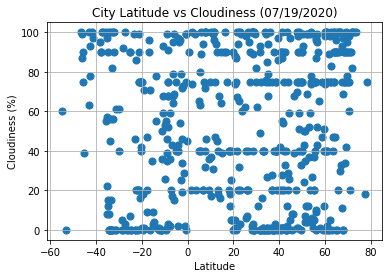

In [10]:
plt.scatter(df['Latitude'],df['Cloudiness'],s=50)
plt.grid(True)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs Cloudiness (07/19/2020)")
plt.show()

## Latitude vs. Windspeed

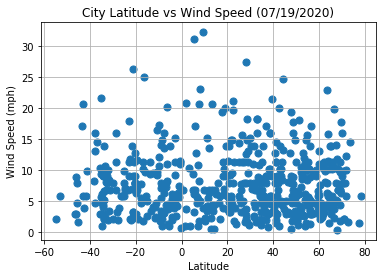

In [11]:
plt.scatter(df['Latitude'],df['Wind Speed'],s=50)
plt.grid(True)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("City Latitude vs Wind Speed (07/19/2020)")
plt.show()

In [12]:
df_north = df.loc[df["Latitude"]>=0]
df_south = df.loc[df["Latitude"]<0]

## Linear Regression Northern Hemisphere

The r-squared is: -0.7156781602143385
y = -0.52x + 93.31


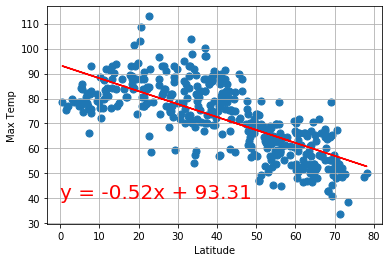

In [13]:
#linear_regressor =  LinearRegression()
#X = df_north.iloc[:, 0].values.reshape(-1, 1)
#Y = df_north.iloc[:, 4].values.reshape(-1, 1)
#linear_regressor.fit(X,Y)
#Y_Pred =  linear_regressor.predict(X)

X = df_north["Latitude"]
Y = df_north["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X,Y)
regress_values = X * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
pos = (0,25)
print(f"The r-squared is: {rvalue}")
print(line_equation)
plt.annotate(line_equation,xy = (0,40),fontsize=20,color="red")
plt.scatter(X,Y,s=50)
plt.plot(X,regress_values,"r")


plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()




## Southern Hemispher Max Temperature Vs Latitude


The r-squared is: 0.762993508072089
y = 0.81x + 83.04


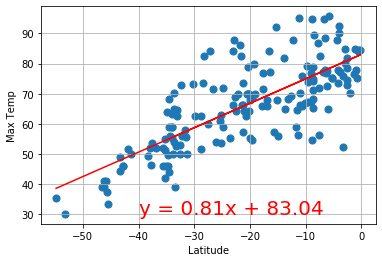

In [14]:
X = df_south["Latitude"]
Y = df_south["Max Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X,Y)
regress_values = X * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
pos = (0,25)
print(f"The r-squared is: {rvalue}")
print(line_equation)
plt.annotate(line_equation,xy = (-40,30),fontsize=20,color="red")
plt.scatter(X,Y,s=50)
plt.plot(X,regress_values,"r")


plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

## Northern Hemisphere-Humidity(%) vs.Latitude Linear Regression

The r-squared is: 0.06448490580202512
y = 0.07x + 65.13


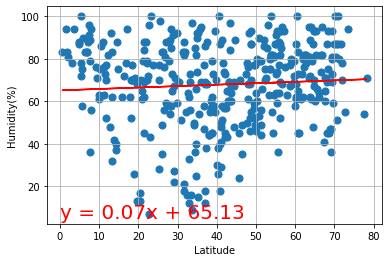

In [15]:
#linear_regressor =  LinearRegression()
#X = df_north.iloc[:, 0].values.reshape(-1, 1)
#Y = df_north.iloc[:, 4].values.reshape(-1, 1)
#linear_regressor.fit(X,Y)
#Y_Pred =  linear_regressor.predict(X)

X = df_north["Latitude"]
Y = df_north["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X,Y)
regress_values = X * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
pos = (0,25)
print(f"The r-squared is: {rvalue}")
print(line_equation)
plt.annotate(line_equation,xy = (0,5),fontsize=20,color="red")
plt.scatter(X,Y,s=50)
plt.plot(X,regress_values,"r")


plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()



## Southern Hemisphere-Humidity(%)  vs.  Latitude Linear Regression

The r-squared is: -0.13096731012664067
y = -0.21x + 63.82


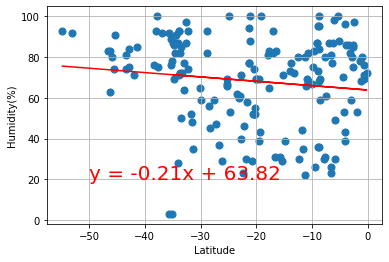

In [16]:
#linear_regressor =  LinearRegression()
#X = df_south.iloc[:, 0].values.reshape(-1, 1)
#Y = df_south.iloc[:, 4].values.reshape(-1, 1)
#linear_regressor.fit(X,Y)
#Y_Pred =  linear_regressor.predict(X)

X = df_south["Latitude"]
Y = df_south["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X,Y)
regress_values = X * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
pos = (0,25)
print(f"The r-squared is: {rvalue}")
print(line_equation)
plt.annotate(line_equation,xy = (-50,20),fontsize=20,color="red")
plt.scatter(X,Y,s=50)
plt.plot(X,regress_values,"r")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()



## Northern Hemisphere-Cloudiness(%) vs.  Latitude Linear Regression

The r-squared is: 0.09214381410148689
y = 0.18x + 45.18


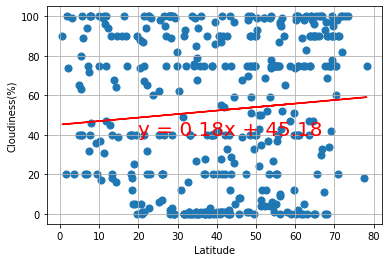

In [17]:
#linear_regressor =  LinearRegression()
#X = df_north.iloc[:, 0].values.reshape(-1, 1)
#Y = df_north.iloc[:, 4].values.reshape(-1, 1)
#linear_regressor.fit(X,Y)
#Y_Pred =  linear_regressor.predict(X)

X = df_north["Latitude"]
Y = df_north["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X,Y)
regress_values = X * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
pos = (0,25)
print(f"The r-squared is: {rvalue}")
print(line_equation)
plt.annotate(line_equation,xy = (20,40),fontsize=20,color="red")
plt.scatter(X,Y,s=50)
plt.plot(X,regress_values,"r")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()




## Southern Hemisphere-Cloudiness(%)Vs.Latitude Linear Regression

The r-squared is: -0.08974991932003677
y = -0.25x + 42.42


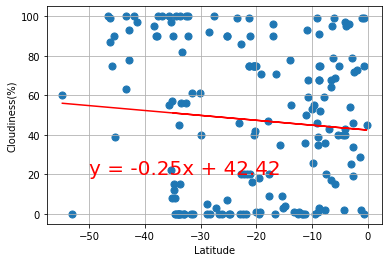

In [18]:
#linear_regressor =  LinearRegression()
#X = df_south.iloc[:, 0].values.reshape(-1, 1)
#Y = df_south.iloc[:, 4].values.reshape(-1, 1)
#linear_regressor.fit(X,Y)
#Y_Pred =  linear_regressor.predict(X)

X = df_south["Latitude"]
Y = df_south["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X,Y)
regress_values = X * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
pos = (0,25)
print(f"The r-squared is: {rvalue}")
print(line_equation)
plt.annotate(line_equation,xy = (-50,20),fontsize=20,color="red")
plt.scatter(X,Y,s=50)
plt.plot(X,regress_values,"r")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()




## Northern Hemisphere-Wind Speed(mph)vs. Latitude Linear Regression

The r-squared is: -0.07286722105170468
y = -0.02x + 8.6


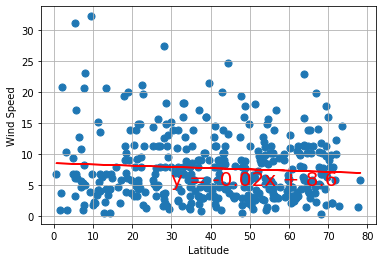

In [19]:
#linear_regressor =  LinearRegression()
#X = df_north.iloc[:, 0].values.reshape(-1, 1)
#Y = df_north.iloc[:, 4].values.reshape(-1, 1)
#linear_regressor.fit(X,Y)
#Y_Pred =  linear_regressor.predict(X)

X = df_north["Latitude"]
Y = df_north["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X,Y)
regress_values = X * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
pos = (0,25)
print(f"The r-squared is: {rvalue}")
print(line_equation)
plt.annotate(line_equation,xy = (30,5),fontsize=20,color="red")
plt.scatter(X,Y,s=50)
plt.plot(X,regress_values,"r")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()




In [20]:
df_north.columns

Index(['Latitude', 'Temperature', 'City', 'Longitude', 'Max Temperature',
       'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'],
      dtype='object')

## Southern Hemisphere-Wind Speed(mph) vs. Latitude Linear Regression 

The r-squared is: -0.021979178962215427
y = -0.01x + 7.36


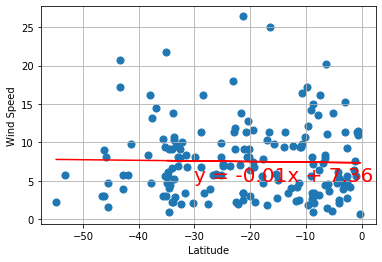

In [21]:
#linear_regressor =  LinearRegression()
#X = df_south.iloc[:, 0].values.reshape(-1, 1)
#Y = df_south.iloc[:, 4].values.reshape(-1, 1)
#linear_regressor.fit(X,Y)
#Y_Pred =  linear_regressor.predict(X)

X = df_south["Latitude"]
Y = df_south["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(X,Y)
regress_values = X * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
pos = (0,25)
print(f"The r-squared is: {rvalue}")
print(line_equation)
plt.annotate(line_equation,xy = (-30,5),fontsize=20,color="red")
plt.scatter(X,Y,s=50)
plt.plot(X,regress_values,"r")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

